In [53]:
pip install scikit-learn pandas matplotlib scipy numpy

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage

data = pd.read_csv('dataset .csv')
print('column names in th dataset :',data.columns.tolist())

column names in th dataset : ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


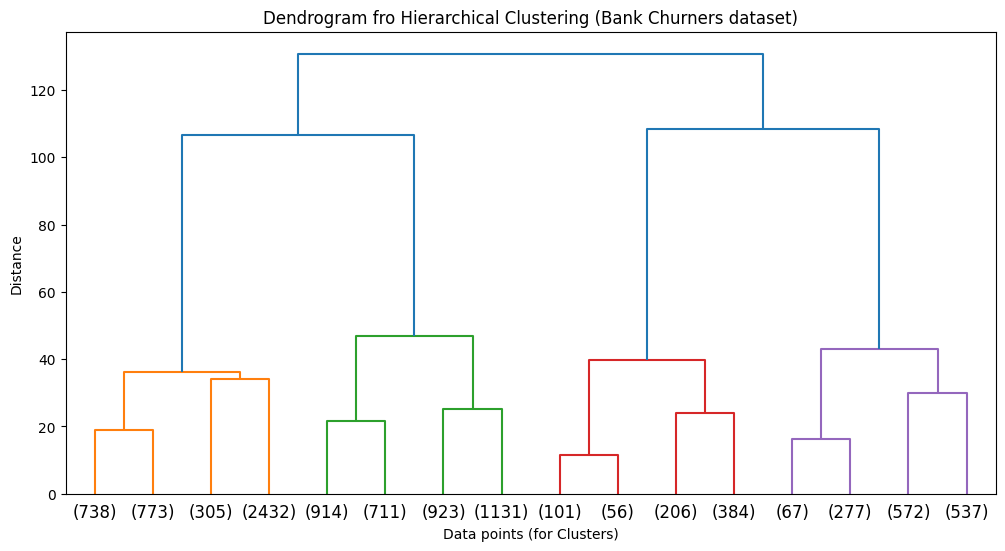

In [55]:
data= data.drop('CLIENTNUM',axis = 1 )
numerical_columns = [
    'Customer_Age',
    'Dependent_count',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Total_Trans_Amt',
    'Total_Trans_Ct'
]
data = data[numerical_columns]

data = data.fillna(data.mean())

x= data[['Total_Revolving_Bal','Total_Trans_Amt','Credit_Limit']].values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
linkage_matrix = linkage(x_scaled,method = 'ward')

plt.figure(figsize=(12,6))
dendrogram(linkage_matrix , truncate_mode = 'level',p=3)
plt.title('Dendrogram fro Hierarchical Clustering (Bank Churners dataset)')
plt.xlabel('Data points (for Clusters)')
plt.ylabel('Distance')
plt.show()

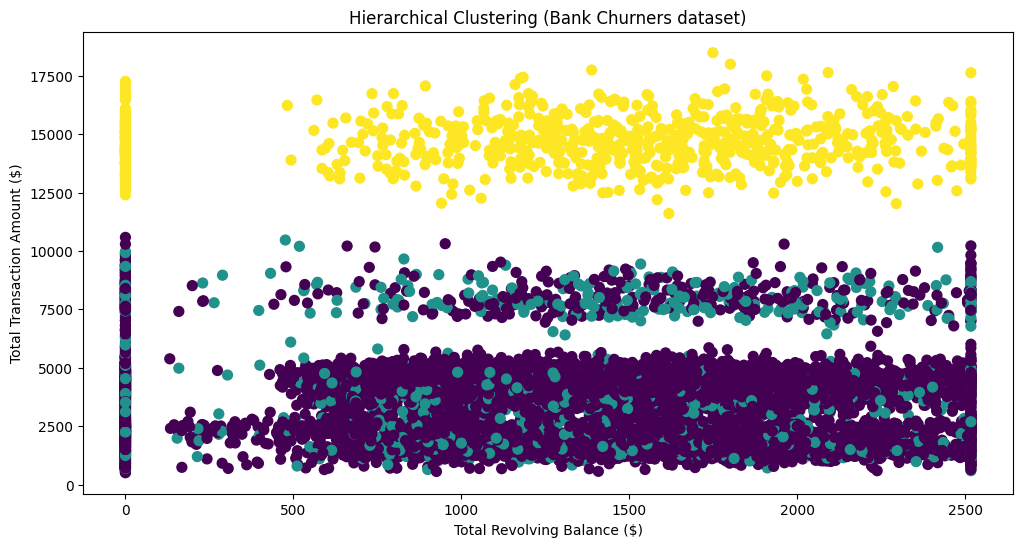

Number of points in each Cluster ;  [7927 1453  747]


In [56]:
model = AgglomerativeClustering(n_clusters = 3 , linkage = 'ward')
labels = model.fit_predict(x_scaled)

plt.figure(figsize=(12,6))
plt.scatter(x[:,0],x[:,1],c=labels , cmap = 'viridis',s=50)
plt.title('Hierarchical Clustering (Bank Churners dataset)')
plt.xlabel('Total Revolving Balance ($)')
plt.ylabel('Total Transaction Amount ($)')
plt.show()

print("Number of points in each Cluster ; ",np.bincount(labels))